In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('dataTokoSembako/penjualan barang.csv')
data

,Unnamed: 0,tanggal,nama.pembeli,nama.barang,kuantum,nominal
0,1,2020-01-02,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2,2020-01-02,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,3,2020-01-02,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,4,2020-01-02,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,5,2020-01-02,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0
...,...,...,...,...,...,...
1284,1285,2021-04-08,TOKO MAJU TERUS,DAGING,60.0,4389600.0
1285,1286,2021-04-08,TOKO KINORA,BERAS,250.0,2718750.0
1286,1287,2021-04-08,TOKO KINORA,TEPUNG,120.0,1065120.0
1287,1288,2021-04-09,TOKO BERKAH DUA PUTRA,GULA,100.0,1200000.0


In [9]:
data = data.drop(columns='Unnamed: 0')
data

,tanggal,nama.pembeli,nama.barang,kuantum,nominal
0,2020-01-02,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2020-01-02,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,2020-01-02,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,2020-01-02,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,2020-01-02,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0
...,...,...,...,...,...
1284,2021-04-08,TOKO MAJU TERUS,DAGING,60.0,4389600.0
1285,2021-04-08,TOKO KINORA,BERAS,250.0,2718750.0
1286,2021-04-08,TOKO KINORA,TEPUNG,120.0,1065120.0
1287,2021-04-09,TOKO BERKAH DUA PUTRA,GULA,100.0,1200000.0


In [11]:
data.max()

tanggal                                      2021-04-09
nama.pembeli    YAYASAN KESEJAHTERAAN PEGAWAI (YKP) BNI
nama.barang                                      TEPUNG
kuantum                                        200000.0
nominal                                    2047000000.0
dtype: object

In [12]:
data.min()

tanggal         2020-01-02
nama.pembeli        ANAPSA
nama.barang          BERAS
kuantum                2.0
nominal            46000.0
dtype: object

In [13]:
data['tanggal']

0       2020-01-02
1       2020-01-02
2       2020-01-02
3       2020-01-02
4       2020-01-02
           ...    
1284    2021-04-08
1285    2021-04-08
1286    2021-04-08
1287    2021-04-09
1288    2021-04-09
Name: tanggal, Length: 1289, dtype: object

In [14]:
#ubah menjadi tipe data datetime
data['tanggal'] = pd.to_datetime(data['tanggal'])
data['tanggal']

0      2020-01-02
1      2020-01-02
2      2020-01-02
3      2020-01-02
4      2020-01-02
          ...    
1284   2021-04-08
1285   2021-04-08
1286   2021-04-08
1287   2021-04-09
1288   2021-04-09
Name: tanggal, Length: 1289, dtype: datetime64[ns]

In [31]:
dataGroup = data.groupby(['tanggal','nama.barang'])[['nama.pembeli','kuantum','nominal']].sum().reset_index()
dataGroup

,tanggal,nama.barang,nama.pembeli,kuantum,nominal
0,2020-01-02,BERAS,TOKO HERUNIAWATITOKO APRILIA SUKRISNITOKO MAJU...,8370.0,86759700.0
1,2020-01-02,DAGING,TOKO HERUNIAWATITOKO MAJU TERUS,260.0,18200000.0
2,2020-01-02,MIGOR,TOKO APRILIA SUKRISNI,408.0,4855200.0
3,2020-01-02,TEPUNG,TOKO APRILIA SUKRISNI,140.0,1162000.0
4,2020-01-03,BERAS,KOPERASI BRI MELAWI,1180.0,12372300.0
...,...,...,...,...,...
368,2021-04-08,DAGING,TOKO MAJU TERUS,60.0,4389600.0
369,2021-04-08,GULA,TOKO MAJU TERUS,100.0,1200000.0
370,2021-04-08,TEPUNG,TOKO KINORA,120.0,1065120.0
371,2021-04-09,DAGING,TOKO BERKAH DUA PUTRA,80.0,5852800.0


Text(0.5, 1.0, 'Barang Yang Banyak Dibeli')

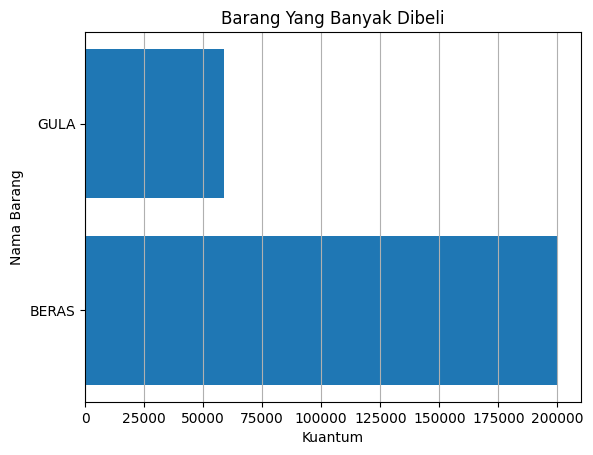

In [80]:
sumbuX = dataGroup.sort_values(by='nominal')['nama.barang'].tail(10)
sumbuY = dataGroup.sort_values(by='nominal')['kuantum'].tail(10)
plt.barh(sumbuX,sumbuY)
plt.grid(axis='x')
plt.ylabel("Nama Barang")
plt.xlabel("Kuantum")
plt.title("Barang Yang Banyak Dibeli")

In [58]:
TotalPenjualan = dataGroup['nominal'].sum()
TotalPenjualan = '{:,}'.format(TotalPenjualan)
print("Total Penjualan 2 Januari 2020 Hingga 9 April 2021\nRp.",TotalPenjualan)

Total Penjualan 2 Januari 2020 Hingga 9 April 2021
Rp. 24,877,315,332.0
